Want to know what a QAOA circuit comprises of in terms of basis gates for ibm_brisbane. This will allow be the build up an expected error profile from the error liklihood of each component

     ┌──────────────────┐
q_0: ┤0                 ├
     │  QAOA(γ[0],β[0]) │
q_1: ┤1                 ├
     └──────────────────┘


C:\Users\rafew\AppData\Local\Temp\ipykernel_5116\2543637184.py:10: DeprecationWarning: The class ``qiskit.primitives.sampler.Sampler`` is deprecated as of qiskit 1.2. It will be removed no earlier than 3 months after the release date. All implementations of the `BaseSamplerV1` interface have been deprecated in favor of their V2 counterparts. The V2 alternative for the `Sampler` class is `StatevectorSampler`.
  sampler = Sampler()


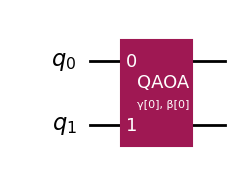

In [19]:
from qiskit.circuit.library import QAOAAnsatz
from qiskit.quantum_info import SparsePauliOp
from qiskit.primitives import Sampler
from qiskit.circuit import QuantumCircuit

# Define a simple cost Hamiltonian (MaxCut example)
hamiltonian = SparsePauliOp.from_list([("ZZ", 1.0), ("IZ", -0.5), ("ZI", -0.5)])

# Define QAOA instance with depth p=1
sampler = Sampler()
qaoa = QAOAAnsatz(cost_operator=hamiltonian, reps=1)

# Get the ansatz circuit
print(qaoa)  # Print the circuit
qaoa.draw("mpl")  # Visualize the decomposed circuit


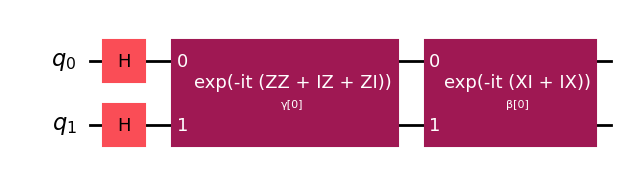

In [20]:
qaoa.decompose().draw("mpl")  # Visualize the decomposed circuit


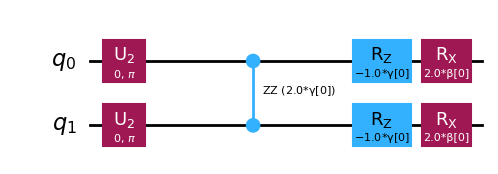

In [7]:
qaoa.decompose().decompose().draw("mpl")  # Visualize the decomposed circuit


In [ ]:
from qiskit import transpile
from qiskit_ibm_runtime import QiskitRuntimeService
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager

# Transpile for a generic IBM backend (adjust as needed)
backend_name = "ibm_brisbane"
    service = QiskitRuntimeService(channel="ibm_quantum",
                                token="0156ceeea246c36a6d8709ede062eb539a013399bee42bfcf3c06794a37ae931b088295b383df9d16c3fadc5075ed80dfb5bb8c74af06524a5adfd7762705795")
backend = service.backend(backend_name)
pm = generate_preset_pass_manager(optimization_level=1, backend=backend)

qc_transpiled_list = pm.run([qaoa])


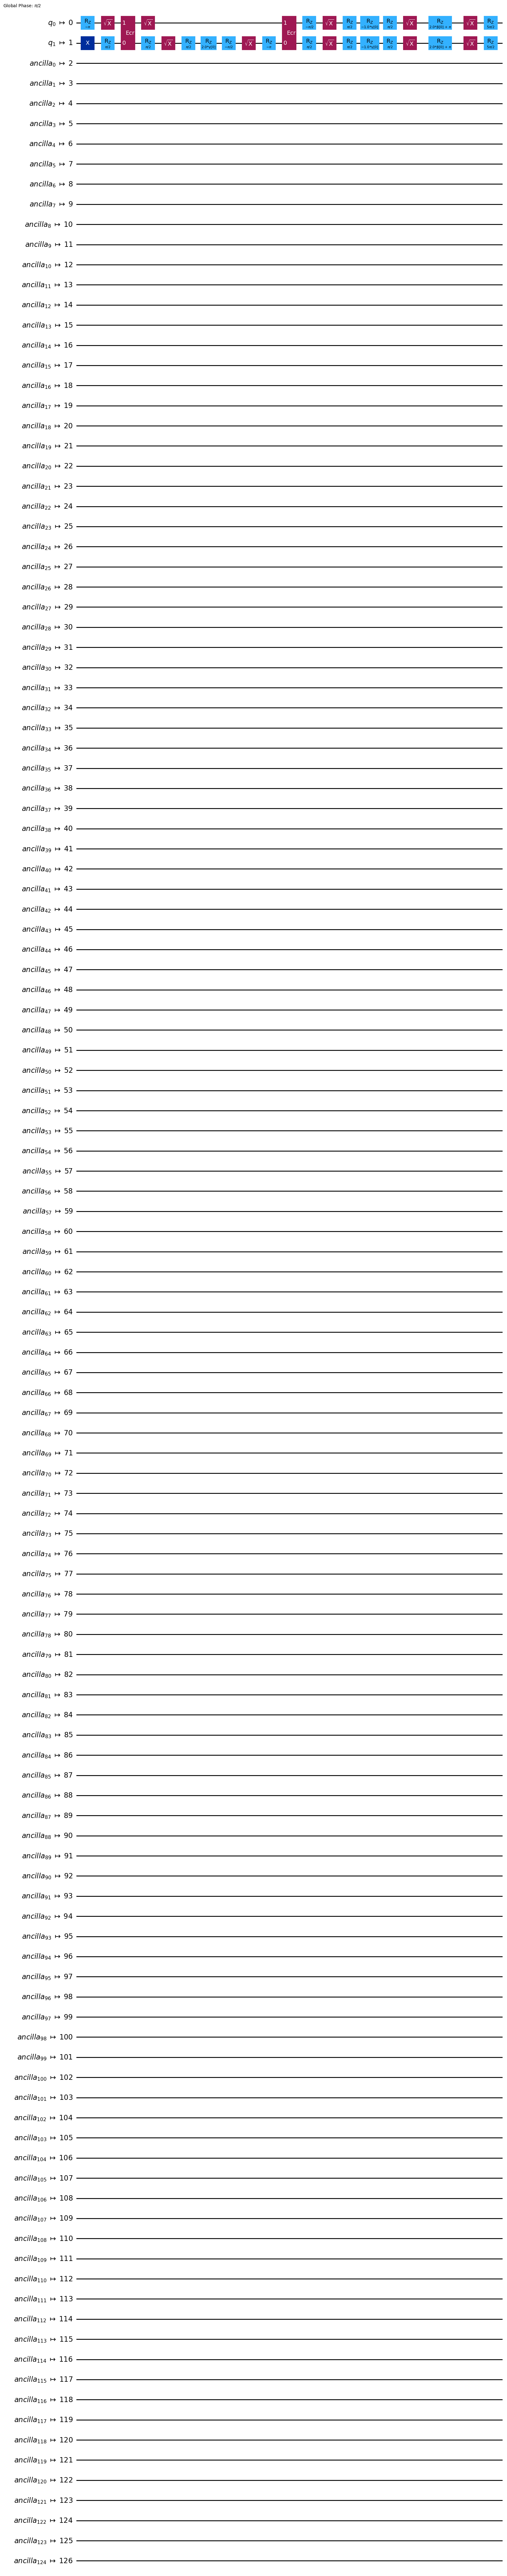

In [18]:
qc_transpiled_list[0].draw("mpl")

<IBMBackend('ibm_brisbane')>